# Eulers metode

Er en numerisk metode for å løse førsteordens differensiallikninger på formen 
$$
y' = f(t,y)  \qquad t \in [a,b]
$$
med initialbetingelsen $y(a) = y_0$. 

For en gitt $n \ge 1$ lages et gitter over $[a,b]$ med steglengde $h = (b-a)/n$ som følger 
$$
t_k = a + kh   \qquad k = 0,1,\ldots, n-1.   
$$
Den numeriske løsningen $y_k \approx y(t_k)$ beregnes iterativt:
$$
y_{k+1} = y_k + f(t_k, y_k) h  \qquad k = 0,1,\ldots, n-1,
$$
hvor vi kjenner $y_0$ fra initialbetingelsen. 

## Konvergensorden 

Gitt at $f$ har tilstrekkelig regularitet, har Eulermetoden global konvergensorden 1. som betyr at
det finnes en konstant $C>0$ slik at 
$$
\max_{  1\le k \le n} |y_k - y(t_k)| \le C h. 
$$
"Orden 1" refererer til potensen i $h$ i ulikheten over. 

Nedenfor er Eulers metode implementert i python for å løse en 
differensiallikning:

In [1]:
#importerer moduler som vi trenger (disse lastest i alle kodesnutter som følger)
import matplotlib.pyplot as plt
import numpy as np


def eulers_metode(f,y0,n ,a,b):
    # losning av y' = f(t,y) for t i [a,b] 
    # med initialbetingelse y(a) = y_0
    # og gitter med steglengde (b-a)/h
    h = (b-a)/n;
    #gitter over [a,b] med steglengde h
    t = np.linspace(a,b,n+1) 
    y = np.zeros(n+1);
    y[0] = y0 
    for k in range(n):
        y[k+1] = y[k] + f(t[k],y[k])*h
        
    return t,y

Vi tester metoden på likningen
$$
y' = y \qquad t \in [0,1]
$$
med initialbetingelsen $y(0)=1$. Løsningen er $y(t)= e^t$.

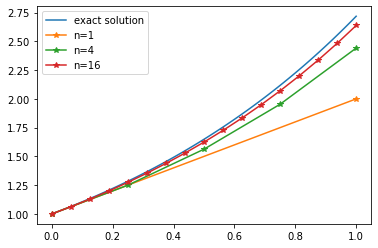

In [2]:
def f(t,y):
    return y

y0=1; a=0; b=1;
t  = np.linspace(a,b,101)
yExact = y0*np.exp(t) 
fig = plt.plot(t,yExact, label="exact solution")

n = 1
[tNum,yNum] = eulers_metode(f,y0,n,a,b)
plt.plot(tNum, yNum, '-*', label="n=1")

n = 4
[tNum,yNum] = eulers_metode(f,y0,n,a,b)
plt.plot(tNum, yNum, '-*',label="n=4")

n = 16
[tNum,yNum] = eulers_metode(f,y0,n,a,b)
plt.plot(tNum, yNum, '-*', label="n=16")
plt.legend()

Forrige forelesning så vi at likningen
$$
y' + \frac{1}{t}y = \sin(t)  \quad  t \in [1, 9] 
$$
med initialbetingelsen $y(1) = 0$ har løsningen 
$$
y(t) = - \cos(t) + \frac{\sin(t) - \sin(1) + \cos(1)}{t}.
$$

Vi merker oss at likningen kan skrives $y' = \sin(t) - \frac{y}{t} =: f(t,y)$
og løser den numerisk under med Eulers metode:

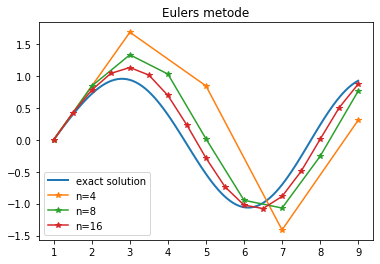

In [3]:
def f(t,y):
    return  np.sin(t) - y/t 

y0=0; a=1; b=9;
t  = np.linspace(a,b,101)
yExact = -np.cos(t) + (np.sin(t) - np.sin(1) +np.cos(1))/t
plt.plot(t,yExact, linewidth =2, label="exact solution")

n =4;
for i in range(3): 

    [tNum,yEul] = eulers_metode(f,y0,n,a,b)
    plt.plot(tNum, yEul, '-*',label="n="+str(n))
    n = 2*n

plt.title("Eulers metode")
plt.legend()

# Eulers midtpunktmetode:
Er en alternativ numerisk metode for å, som før, 
løse førsteordenslikningen 
$$
y' = f(t,y)  \qquad t \in [a,b]
$$
med initialbetingelsen $y(a) = y_0$.

Som tidligere at vi har et uniform gitter over $[a,b]$, $t_k = a + k h$ for $k =0,1,\ldots,n$, og den numeriske løsningen settes til verdien $y_0$ ved tiden $t_0$. 

For $k=0,1,\ldots,n-1$ iterereres følgende skjema, som består av to delsteg:
* beregn løsningens verdi i midtpunktet $t_{k+1/2} = (t_k+t_{k+1})/2$:
$$
    y_{k+1/2} = y_k + f(t_k, y_k) h/2
$$
* bruk midtpunktverdien i approksimasjonen av intløsningen ved neste tiden 
$$
y_{k+1} = y_k + f(t_{k+1/2}, y_{k+1/2}) h
$$

## Motivasjon for skjemaet: 
Fra lokalfeilen for midtpunktmetoden (numerisk integrasjon)
$$
y(t_{k+1}) - y(t_k)  = \int_{t_k}^{t_{k+1}} f(t,y(t)) dt
= 
\int_{t_k}^{t_{k+1}} f(t_{k+1/2}, y(t_{k+1/2})) dt + \mathcal{O}(h^3)
$$
som impliserer at 
$$
y(t_{k+1}) = y(t_{k}) + f(t_{k+1/2}, y(t_{k+1/2})) h + \mathcal{O}(h^3).
$$
Om vi antar at vi kjenner $y(t_k)$ men ikke $y(t_{k+1/2})$, kan vi bruke at: 
$$
y(t_{k+1/2}) = y(t_{k}) + (h/2) f(t_k,y(t_k)) + \mathcal{O}(h^2) \, .
$$ 
Det gir at 
$$
y(t_{k+1}) = y(t_{k}) + f\Big(t_{k+1/2},\, y(t_{k}) + (h/2) f(t_k,y(t_k)) \Big) h + \mathcal{O}(h^3).
$$

## Konvergensorden
Gitt at $f$ har tilstrekkelig regularitet, har Eulers midtpunktmetode global konvergensorden 2, som betyr at det finnes en konstant $C>0$ slik at 
$$
\max_{  1\le k \le n} |y_k - y(t_k)| \le C h^2. 
$$

Vi implementerer metoden i Python i boksen under. 

In [4]:
def eulers_midtpunkt_metode(f,y0,n ,a,b):
    # losning av y' = f(t,y) for t i [a,b] 
    # med initialbetingelse y(a) = y_0
    # og gitter med steglengde (b-a)/h
    h = (b-a)/n;
    #gitter over [a,b] med steglengde h
    t = np.linspace(a,b,n+1) 
    y = np.zeros(n+1);
    y[0] = y0 
    for k in range(n):
        yMid   = y[k] + f(t[k], y[k])*(h/2) # y_{k+1/2}
        tMid   = (t[k] + t[k+1])/2 # t_{k+1/2}
        y[k+1] = y[k] + f(tMid,yMid)*h
        
    return t,y

I koden under sammenlikner vi løsningene til Eulers metode og Eulers midtpunktmetode for problemet 
$$
y' + \frac{1}{t}y = \sin(t)   \quad  t \in [1, 9] 
$$
med initialbetingelsen $y(1) = 0$.

Eulers midtpunktmetode konvergerer raskere enn Eulers metode. Dette er som forventet, siden midtpunktmetoden har høyere konvergensorden enn Eulers metode.

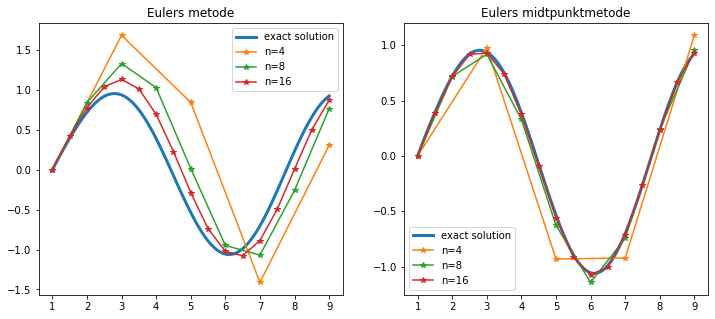

In [5]:
def f(t,y):
    return  np.sin(t) - y/t 

y0=0; a=1; b=9;
t  = np.linspace(a,b,101)
yExact = -np.cos(t) + (np.sin(t) - np.sin(1) +np.cos(1))/t

fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(t,yExact, linewidth =3, label="exact solution")
ax[1].plot(t,yExact, linewidth =3, label="exact solution")

n =4;
for i in range(3): 

    [tNum,yEul] = eulers_metode(f,y0,n,a,b)
    ax[0].plot(tNum, yEul, '-*',label="n="+str(n))
    [tNum,yMid] = eulers_midtpunkt_metode(f,y0,n,a,b)
    ax[1].plot(tNum, yMid, '-*',label="n="+str(n))
    n = 2*n


ax[0].set_title("Eulers metode")
ax[1].set_title("Eulers midtpunktmetode")
ax[0].legend()
ax[1].legend()

Oppgaver for interesserte: bruk metodene til å løse andre førsteordens differensiallikninger fra lærebøkene, og prøv å numerisk verifisere konvergensordenen til metodene ved å studere hvordan den globale feilen synker med $h$ for de ulike metodene (f eks for problemet vi studerte over). 